In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df = pd.read_csv('walmart_data.csv')

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df.shape

(550068, 10)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase_Amt                550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


In [179]:
#No null values found
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase_Amt                  0.0
dtype: float64

In [10]:
df.describe().drop('count').drop(['User_ID', 'Product_Category', 'Occupation', 'Marital_Status'] , axis = 1)

,Purchase
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [180]:
for i in df.columns:
    print(f'\033[1m{i}\033[0m : {df[i].unique()}, \033[1mCount\033[0m : {len(new_df[i].unique())} \n')

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529], Count : 5891 

Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'], Count : 3631 

Gender : ['F' 'M'], Count : 2 

Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'], Count : 7 

Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6], Count : 11 

City_Category : ['A' 'C' 'B'], Count : 3 

Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0'], Count : 5 

Marital_Status : ['Single' 'Married'], Count : 2 

Product_Category : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19], Count : 11 

Purchase_Amt : [ 8370 15200  1422 ...   135   123   613], Count : 12 



In [318]:
df['Marital_Status'].replace({0 : 'Single', 1 : 'Married'}, inplace = True)

In [319]:
df.rename(columns={'Purchase':'Purchase_Amt'}, inplace = True)

In [311]:
print(df['Purchase_Amt'].min(),',', df['Purchase_Amt'].max())

12 , 23961


In [312]:
print(df['Product_Category'].max(), ',',  df['Product_Category'].min())

20 , 1


In [313]:
print(df['Occupation'].max(), ',',  df['Occupation'].min())

20 , 0


In [17]:
new_df = df.copy()

In [18]:
new_df['Purchase_Amt'] = pd.cut(new_df['Purchase_Amt'], np.arange(0, 25000, 2000), right = False)
new_df['Product_Category'] = pd.cut(new_df['Product_Category'], np.arange(0, 24, 2), right = False)
new_df['Occupation'] = pd.cut(new_df['Occupation'], np.arange(0, 24, 2), right = False)

In [19]:
for i in df.columns:
    print(f'\033[1m{i}\033[0m : {new_df[i].unique()}, \033[1mCount\033[0m : {len(new_df[i].unique())} \n')

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529], Count : 5891 

Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'], Count : 3631 

Gender : ['F' 'M'], Count : 2 

Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'], Count : 7 

Occupation : [[10, 12), [16, 18), [14, 16), [6, 8), [20, 22), ..., [0, 2), [12, 14), [2, 4), [4, 6), [18, 20)]
Length: 11
Categories (11, interval[int64, left]): [[0, 2) < [2, 4) < [4, 6) < [6, 8) ... [14, 16) < [16, 18) < [18, 20) < [20, 22)], Count : 11 

City_Category : ['A' 'C' 'B'], Count : 3 

Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0'], Count : 5 

Marital_Status : ['Single' 'Married'], Count : 2 

Product_Category : [[2, 4), [0, 2), [12, 14), [8, 10), [4, 6), ..., [14, 16), [10, 12), [16, 18), [18, 20), [20, 22)]
Length: 11
Categories (11, interval[int64, left]): [[0, 2) < [2, 4) < [4, 6) < [6, 8) ... [14, 16) < [16, 18) < [18, 20) < [20, 22)], Count : 11 

Purchase_Amt : [[8000, 1

In [20]:
from IPython.display import display
for i in new_df.iloc[:,2:9].columns:
    print('\033[1mPurchase_Amt vs {}'.format(i))
    display(pd.crosstab(new_df['Purchase_Amt'], new_df[i], margins = True))
    print('\033[1mP({}/Purchase_Amt)'.format(i))
    display(pd.crosstab(new_df['Purchase_Amt'], new_df[i], margins = True, normalize='index'))
    print('\n')
    print('\033[1mP(Purchase_Amt/{})'.format(i))
    display(pd.crosstab(new_df['Purchase_Amt'], new_df[i], margins = True, normalize='columns'))
    print('\n')

Purchase_Amt vs Gender


Gender,F,M,All
Purchase_Amt,,,
"[0, 2000)",7692,20292,27984
"[2000, 4000)",11756,33767,45523
"[4000, 6000)",20688,58331,79019
"[6000, 8000)",31186,84459,115645
"[8000, 10000)",25526,66832,92358
"[10000, 12000)",10482,38473,48955
"[12000, 14000)",6782,22283,29065
"[14000, 16000)",9188,41025,50213
"[16000, 18000)",3957,13289,17246


P(Gender/Purchase_Amt)


Gender,F,M
Purchase_Amt,,
"[0, 2000)",0.274871,0.725129
"[2000, 4000)",0.258243,0.741757
"[4000, 6000)",0.261810,0.738190
"[6000, 8000)",0.269670,0.730330
"[8000, 10000)",0.276381,0.723619
"[10000, 12000)",0.214115,0.785885
"[12000, 14000)",0.233339,0.766661
"[14000, 16000)",0.182981,0.817019
"[16000, 18000)",0.229445,0.770555




P(Purchase_Amt/Gender)


Gender,F,M,All
Purchase_Amt,,,
"[0, 2000)",0.056638,0.048984,0.050874
"[2000, 4000)",0.086563,0.081512,0.082759
"[4000, 6000)",0.152332,0.140808,0.143653
"[6000, 8000)",0.229631,0.203880,0.210238
"[8000, 10000)",0.187955,0.161329,0.167903
"[10000, 12000)",0.077182,0.092872,0.088998
"[12000, 14000)",0.049938,0.053790,0.052839
"[14000, 16000)",0.067654,0.099032,0.091285
"[16000, 18000)",0.029137,0.032079,0.031352




Purchase_Amt vs Age


Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Purchase_Amt,,,,,,,,
"[0, 2000)",1024,5247,10502,5472,2418,2000,1321,27984
"[2000, 4000)",1635,9103,18538,8689,3565,2618,1375,45523
"[4000, 6000)",1993,14770,32725,15673,6379,4878,2601,79019
"[6000, 8000)",2937,20052,46320,23326,10041,8303,4666,115645
"[8000, 10000)",2511,16202,35705,18301,8034,7113,4492,92358
"[10000, 12000)",1368,9072,19795,9807,3847,3283,1783,48955
"[12000, 14000)",841,5363,11373,5998,2484,2024,982,29065
"[14000, 16000)",1206,9143,20293,10418,3917,3489,1747,50213
"[16000, 18000)",393,2727,6842,3566,1593,1342,783,17246


P(Age/Purchase_Amt)


Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Purchase_Amt,,,,,,,
"[0, 2000)",0.036592,0.187500,0.375286,0.195540,0.086407,0.071469,0.047206
"[2000, 4000)",0.035916,0.199965,0.407223,0.190871,0.078312,0.057509,0.030205
"[4000, 6000)",0.025222,0.186917,0.414141,0.198345,0.080727,0.061732,0.032916
"[6000, 8000)",0.025397,0.173393,0.400536,0.201703,0.086826,0.071797,0.040348
"[8000, 10000)",0.027188,0.175426,0.386593,0.198153,0.086988,0.077016,0.048637
"[10000, 12000)",0.027944,0.185313,0.404351,0.200327,0.078582,0.067062,0.036421
"[12000, 14000)",0.028935,0.184517,0.391295,0.206365,0.085464,0.069637,0.033786
"[14000, 16000)",0.024018,0.182084,0.404138,0.207476,0.078008,0.069484,0.034792
"[16000, 18000)",0.022788,0.158124,0.396730,0.206773,0.092369,0.077815,0.045402




P(Purchase_Amt/Age)


Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Purchase_Amt,,,,,,,,
"[0, 2000)",0.067806,0.052649,0.047826,0.049740,0.052909,0.051947,0.061430,0.050874
"[2000, 4000)",0.108264,0.091341,0.084422,0.078982,0.078007,0.067998,0.063942,0.082759
"[4000, 6000)",0.131969,0.148204,0.149030,0.142465,0.139581,0.126698,0.120954,0.143653
"[6000, 8000)",0.194478,0.201204,0.210941,0.212029,0.219711,0.215657,0.216983,0.210238
"[8000, 10000)",0.166269,0.162573,0.162601,0.166353,0.175795,0.184748,0.208891,0.167903
"[10000, 12000)",0.090584,0.091030,0.090147,0.089144,0.084178,0.085271,0.082915,0.088998
"[12000, 14000)",0.055688,0.053813,0.051793,0.054521,0.054353,0.052570,0.045666,0.052839
"[14000, 16000)",0.079857,0.091742,0.092414,0.094698,0.085709,0.090621,0.081241,0.091285
"[16000, 18000)",0.026023,0.027363,0.031158,0.032414,0.034857,0.034856,0.036412,0.031352




Purchase_Amt vs Occupation


Occupation,"[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)",All
Purchase_Amt,,,,,,,,,,,,
"[0, 2000)",6136,2283,4300,3980,425,1536,1777,1751,3076,875,1845,27984
"[2000, 4000)",9869,3816,7469,6268,677,2437,2710,2973,4801,1408,3095,45523
"[4000, 6000)",17404,6752,12481,11196,1225,3198,4923,5320,8784,2469,5267,79019
"[6000, 8000)",25596,9583,16947,16895,1711,4926,8157,8177,13044,3176,7433,115645
"[8000, 10000)",19958,7822,14067,13168,1352,4234,6700,6748,10312,2193,5804,92358
"[10000, 12000)",10275,3561,7706,6890,713,2100,3601,3565,6598,1357,2589,48955
"[12000, 14000)",6037,2178,4488,4064,454,1311,2126,2095,3771,822,1719,29065
"[14000, 16000)",9809,3451,7727,7755,615,2107,3977,4024,7143,1263,2342,50213
"[16000, 18000)",3651,1378,2330,2600,216,671,1287,1313,2208,430,1162,17246


P(Occupation/Purchase_Amt)


Occupation,"[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)"
Purchase_Amt,,,,,,,,,,,
"[0, 2000)",0.219268,0.081582,0.153659,0.142224,0.015187,0.054889,0.063501,0.062571,0.109920,0.031268,0.065931
"[2000, 4000)",0.216792,0.083826,0.164071,0.137689,0.014872,0.053533,0.059530,0.065308,0.105463,0.030929,0.067988
"[4000, 6000)",0.220251,0.085448,0.157949,0.141687,0.015503,0.040471,0.062301,0.067326,0.111163,0.031246,0.066655
"[6000, 8000)",0.221333,0.082866,0.146543,0.146094,0.014795,0.042596,0.070535,0.070708,0.112793,0.027463,0.064274
"[8000, 10000)",0.216094,0.084692,0.152309,0.142576,0.014639,0.045843,0.072544,0.073064,0.111652,0.023745,0.062842
"[10000, 12000)",0.209887,0.072740,0.157410,0.140741,0.014564,0.042897,0.073557,0.072822,0.134777,0.027719,0.052885
"[12000, 14000)",0.207707,0.074935,0.154413,0.139825,0.015620,0.045106,0.073146,0.072080,0.129744,0.028281,0.059143
"[14000, 16000)",0.195348,0.068727,0.153884,0.154442,0.012248,0.041961,0.079203,0.080139,0.142254,0.025153,0.046641
"[16000, 18000)",0.211701,0.079903,0.135104,0.150760,0.012525,0.038908,0.074626,0.076134,0.128030,0.024933,0.067378




P(Purchase_Amt/Occupation)


Occupation,"[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)",All
Purchase_Amt,,,,,,,,,,,,
"[0, 2000)",0.052416,0.051607,0.050897,0.050070,0.054230,0.062653,0.045673,0.044358,0.047024,0.058012,0.054973,0.050874
"[2000, 4000)",0.084304,0.086261,0.088406,0.078855,0.086385,0.099404,0.069653,0.075315,0.073394,0.093350,0.092217,0.082759
"[4000, 6000)",0.148671,0.152629,0.147730,0.140851,0.156310,0.130445,0.126533,0.134772,0.134283,0.163694,0.156933,0.143653
"[6000, 8000)",0.218650,0.216624,0.200592,0.212548,0.218323,0.200930,0.209654,0.207149,0.199407,0.210568,0.221471,0.210238
"[8000, 10000)",0.170488,0.176816,0.166503,0.165660,0.172515,0.172704,0.172206,0.170948,0.157642,0.145395,0.172934,0.167903
"[10000, 12000)",0.087773,0.080496,0.091211,0.086680,0.090979,0.085658,0.092554,0.090313,0.100865,0.089969,0.077141,0.088998
"[12000, 14000)",0.051570,0.049234,0.053122,0.051127,0.057930,0.053475,0.054643,0.053073,0.057648,0.054498,0.051219,0.052839
"[14000, 16000)",0.083792,0.078010,0.091460,0.097562,0.078474,0.085944,0.102218,0.101941,0.109197,0.083737,0.069781,0.091285
"[16000, 18000)",0.031188,0.031150,0.027579,0.032709,0.027562,0.027370,0.033079,0.033262,0.033754,0.028509,0.034622,0.031352




Purchase_Amt vs City_Category


City_Category,A,B,C,All
Purchase_Amt,,,,
"[0, 2000)",7790,11387,8807,27984
"[2000, 4000)",13331,20049,12143,45523
"[4000, 6000)",23302,34661,21056,79019
"[6000, 8000)",32181,49184,34280,115645
"[8000, 10000)",24474,37705,30179,92358
"[10000, 12000)",12683,20710,15562,48955
"[12000, 14000)",7752,12399,8914,29065
"[14000, 16000)",11690,20906,17617,50213
"[16000, 18000)",4465,7229,5552,17246


P(City_Category/Purchase_Amt)


City_Category,A,B,C
Purchase_Amt,,,
"[0, 2000)",0.278373,0.406911,0.314716
"[2000, 4000)",0.292841,0.440415,0.266744
"[4000, 6000)",0.294891,0.438641,0.266468
"[6000, 8000)",0.278274,0.425302,0.296424
"[8000, 10000)",0.264991,0.408248,0.326761
"[10000, 12000)",0.259075,0.423042,0.317884
"[12000, 14000)",0.266713,0.426596,0.306692
"[14000, 16000)",0.232808,0.416346,0.350845
"[16000, 18000)",0.258901,0.419170,0.321930




P(Purchase_Amt/City_Category)


City_Category,A,B,C,All
Purchase_Amt,,,,
"[0, 2000)",0.052735,0.049257,0.051450,0.050874
"[2000, 4000)",0.090245,0.086727,0.070939,0.082759
"[4000, 6000)",0.157744,0.149935,0.123009,0.143653
"[6000, 8000)",0.217851,0.212758,0.200263,0.210238
"[8000, 10000)",0.165678,0.163103,0.176305,0.167903
"[10000, 12000)",0.085858,0.089587,0.090913,0.088998
"[12000, 14000)",0.052478,0.053635,0.052075,0.052839
"[14000, 16000)",0.079136,0.090434,0.102918,0.091285
"[16000, 18000)",0.030226,0.031271,0.032435,0.031352




Purchase_Amt vs Stay_In_Current_City_Years


Stay_In_Current_City_Years,0,1,2,3,4+,All
Purchase_Amt,,,,,,
"[0, 2000)",3954,9858,5279,4631,4262,27984
"[2000, 4000)",6149,16281,8281,7869,6943,45523
"[4000, 6000)",10772,28015,14347,13733,12152,79019
"[6000, 8000)",15801,40643,21101,20235,17865,115645
"[8000, 10000)",12595,32506,17148,15779,14330,92358
"[10000, 12000)",6603,17246,9000,8455,7651,48955
"[12000, 14000)",3989,10153,5499,5075,4349,29065
"[14000, 16000)",6536,17372,9681,8930,7694,50213
"[16000, 18000)",2292,6189,3140,2942,2683,17246


P(Stay_In_Current_City_Years/Purchase_Amt)


Stay_In_Current_City_Years,0,1,2,3,4+
Purchase_Amt,,,,,
"[0, 2000)",0.141295,0.352273,0.188644,0.165487,0.152301
"[2000, 4000)",0.135075,0.357643,0.181908,0.172858,0.152516
"[4000, 6000)",0.136322,0.354535,0.181564,0.173794,0.153786
"[6000, 8000)",0.136634,0.351446,0.182464,0.174975,0.154481
"[8000, 10000)",0.136372,0.351957,0.185669,0.170846,0.155157
"[10000, 12000)",0.134879,0.352283,0.183842,0.172710,0.156286
"[12000, 14000)",0.137244,0.349320,0.189197,0.174609,0.149630
"[14000, 16000)",0.130165,0.345966,0.192799,0.177842,0.153227
"[16000, 18000)",0.132900,0.358866,0.182071,0.170590,0.155572




P(Purchase_Amt/Stay_In_Current_City_Years)


Stay_In_Current_City_Years,0,1,2,3,4+,All
Purchase_Amt,,,,,,
"[0, 2000)",0.053147,0.050861,0.051837,0.048602,0.050303,0.050874
"[2000, 4000)",0.082650,0.084000,0.081315,0.082584,0.081947,0.082759
"[4000, 6000)",0.144789,0.144541,0.140881,0.144126,0.143427,0.143653
"[6000, 8000)",0.212385,0.209693,0.207202,0.212363,0.210856,0.210238
"[8000, 10000)",0.169292,0.167711,0.168385,0.165598,0.169133,0.167903
"[10000, 12000)",0.088752,0.088979,0.088376,0.088734,0.090303,0.088998
"[12000, 14000)",0.053617,0.052383,0.053998,0.053261,0.051330,0.052839
"[14000, 16000)",0.087852,0.089629,0.095063,0.093719,0.090810,0.091285
"[16000, 18000)",0.030807,0.031932,0.030833,0.030876,0.031667,0.031352




Purchase_Amt vs Marital_Status


Marital_Status,Married,Single,All
Purchase_Amt,,,
"[0, 2000)",11755,16229,27984
"[2000, 4000)",18220,27303,45523
"[4000, 6000)",32100,46919,79019
"[6000, 8000)",47456,68189,115645
"[8000, 10000)",38546,53812,92358
"[10000, 12000)",19889,29066,48955
"[12000, 14000)",12029,17036,29065
"[14000, 16000)",20141,30072,50213
"[16000, 18000)",7280,9966,17246


P(Marital_Status/Purchase_Amt)


Marital_Status,Married,Single
Purchase_Amt,,
"[0, 2000)",0.420061,0.579939
"[2000, 4000)",0.400237,0.599763
"[4000, 6000)",0.406231,0.593769
"[6000, 8000)",0.410359,0.589641
"[8000, 10000)",0.417354,0.582646
"[10000, 12000)",0.406271,0.593729
"[12000, 14000)",0.413865,0.586135
"[14000, 16000)",0.401111,0.598889
"[16000, 18000)",0.422127,0.577873




P(Purchase_Amt/Marital_Status)


Marital_Status,Married,Single,All
Purchase_Amt,,,
"[0, 2000)",0.052166,0.049977,0.050874
"[2000, 4000)",0.080857,0.084079,0.082759
"[4000, 6000)",0.142453,0.144486,0.143653
"[6000, 8000)",0.210600,0.209986,0.210238
"[8000, 10000)",0.171059,0.165713,0.167903
"[10000, 12000)",0.088263,0.089508,0.088998
"[12000, 14000)",0.053382,0.052462,0.052839
"[14000, 16000)",0.089382,0.092606,0.091285
"[16000, 18000)",0.032307,0.030690,0.031352




Purchase_Amt vs Product_Category


Product_Category,"[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)",All
Purchase_Amt,,,,,,,,,,,,
"[0, 2000)",0,0,10064,0,551,3481,9496,0,0,1842,2550,27984
"[2000, 4000)",2546,2465,27320,14,6093,4158,0,34,7,2886,0,45523
"[4000, 6000)",6472,1484,40615,626,19369,9327,0,600,526,0,0,79019
"[6000, 8000)",9471,3861,53090,62,41520,7375,0,189,77,0,0,115645
"[8000, 10000)",7642,9462,31597,1535,39929,187,0,873,1133,0,0,92358
"[10000, 12000)",32094,9226,0,367,6563,37,0,419,249,0,0,48955
"[12000, 14000)",6528,13142,0,4816,54,161,0,1578,2786,0,0,29065
"[14000, 16000)",47304,875,0,829,62,629,0,514,0,0,0,50213
"[16000, 18000)",0,3562,0,8317,0,0,0,1704,3663,0,0,17246


P(Product_Category/Purchase_Amt)


Product_Category,"[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)"
Purchase_Amt,,,,,,,,,,,
"[0, 2000)",0.000000,0.000000,0.359634,0.000000,0.019690,0.124393,0.339337,0.000000,0.000000,0.065823,0.091123
"[2000, 4000)",0.055928,0.054148,0.600136,0.000308,0.133844,0.091338,0.000000,0.000747,0.000154,0.063397,0.000000
"[4000, 6000)",0.081904,0.018780,0.513990,0.007922,0.245118,0.118035,0.000000,0.007593,0.006657,0.000000,0.000000
"[6000, 8000)",0.081897,0.033387,0.459077,0.000536,0.359030,0.063773,0.000000,0.001634,0.000666,0.000000,0.000000
"[8000, 10000)",0.082743,0.102449,0.342114,0.016620,0.432329,0.002025,0.000000,0.009452,0.012267,0.000000,0.000000
"[10000, 12000)",0.655582,0.188459,0.000000,0.007497,0.134062,0.000756,0.000000,0.008559,0.005086,0.000000,0.000000
"[12000, 14000)",0.224600,0.452159,0.000000,0.165698,0.001858,0.005539,0.000000,0.054292,0.095854,0.000000,0.000000
"[14000, 16000)",0.942067,0.017426,0.000000,0.016510,0.001235,0.012527,0.000000,0.010236,0.000000,0.000000,0.000000
"[16000, 18000)",0.000000,0.206541,0.000000,0.482257,0.000000,0.000000,0.000000,0.098806,0.212397,0.000000,0.000000




P(Purchase_Amt/Product_Category)


Product_Category,"[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)",All
Purchase_Amt,,,,,,,,,,,,
"[0, 2000)",0.000000,0.000000,0.061862,0.000000,0.004819,0.118353,1.0,0.000000,0.000000,0.389594,1.0,0.050874
"[2000, 4000)",0.018137,0.055925,0.167931,0.000579,0.053291,0.141371,0.0,0.004352,0.000673,0.610406,0.0,0.082759
"[4000, 6000)",0.046104,0.033668,0.249653,0.025882,0.169406,0.317115,0.0,0.076795,0.050548,0.000000,0.0,0.143653
"[6000, 8000)",0.067468,0.087597,0.326334,0.002563,0.363143,0.250748,0.0,0.024190,0.007400,0.000000,0.0,0.210238
"[8000, 10000)",0.054439,0.214670,0.194221,0.063464,0.349228,0.006358,0.0,0.111737,0.108879,0.000000,0.0,0.167903
"[10000, 12000)",0.228626,0.209316,0.000000,0.015173,0.057401,0.001258,0.0,0.053629,0.023929,0.000000,0.0,0.088998
"[12000, 14000)",0.046503,0.298160,0.000000,0.199115,0.000472,0.005474,0.0,0.201971,0.267730,0.000000,0.0,0.052839
"[14000, 16000)",0.336976,0.019852,0.000000,0.034275,0.000542,0.021386,0.0,0.065788,0.000000,0.000000,0.0,0.091285
"[16000, 18000)",0.000000,0.080813,0.000000,0.343862,0.000000,0.000000,0.0,0.218098,0.352008,0.000000,0.0,0.031352


In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amt
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [22]:
#Sample data in millions
df['Gender'].value_counts()/1000000

M    0.414259
F    0.135809
Name: Gender, dtype: float64

In [284]:
df1 = df.groupby(['User_ID', 'Gender', 'Age', 'Marital_Status', 'Stay_In_Current_City_Years'])['Purchase_Amt'].sum().to_frame().reset_index()

In [282]:
df1

,User_ID,Gender,Age,Marital_Status,Stay_In_Current_City_Years,Purchase_Amt
0,1000001,F,0-17,Single,2,334093
1,1000002,M,55+,Single,4+,810472
2,1000003,M,26-35,Single,3,341635
3,1000004,M,46-50,Married,2,206468
4,1000005,M,26-35,Married,1,821001
...,...,...,...,...,...,...
5886,1006036,F,26-35,Married,4+,4116058
5887,1006037,F,46-50,Single,4+,1119538
5888,1006038,F,55+,Single,2,90034
5889,1006039,F,46-50,Married,4+,590319


<AxesSubplot:xlabel='Purchase_Amt'>

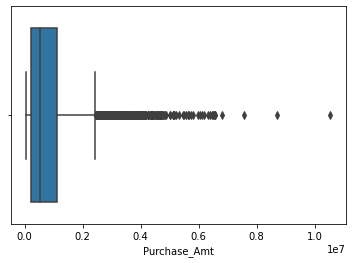

In [84]:
sns.boxplot(x = df1['Purchase_Amt'])

### Outlier treatment

In [85]:
IQR = np.percentile(df1['Purchase_Amt'], 75) - np.percentile(df1['Purchase_Amt'], 25)
Max = np.percentile(df1['Purchase_Amt'], 75) + 1.5 * IQR
Min = np.percentile(df1['Purchase_Amt'], 25) - 1.5 * IQR

In [285]:
df1 = df1[(df1['Purchase_Amt'] <= Max)]

In [286]:
df1

,User_ID,Gender,Age,Marital_Status,Stay_In_Current_City_Years,Purchase_Amt
0,1000001,F,0-17,Single,2,334093
1,1000002,M,55+,Single,4+,810472
2,1000003,M,26-35,Single,3,341635
3,1000004,M,46-50,Married,2,206468
4,1000005,M,26-35,Married,1,821001
...,...,...,...,...,...,...
5885,1006035,F,26-35,Single,3,956645
5887,1006037,F,46-50,Single,4+,1119538
5888,1006038,F,55+,Single,2,90034
5889,1006039,F,46-50,Married,4+,590319


### CLT for C.I for mean on purchase w.r.t gender

In [88]:
df1['Gender'].value_counts()

M    3898
F    1584
Name: Gender, dtype: int64

#### Male

In [115]:
r = 12828
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Gender'] == 'M']['Purchase_Amt'], size = df1['Gender'].value_counts()[0])
    bs_means[i] = np.mean(bs_sample)

In [375]:
print(f'\033[1m 95 % C.I for mean on purchase by a male is [{round((np.mean(bs_means) - 2 * np.std(bs_means))/1000000, 3)}m, {round((np.mean(bs_means) + 2 * np.std(bs_means))/1000000, 3)}m]\033[0m')

 95 % C.I for mean on purchase by a male is [0.688m, 0.725m]


In [376]:
print(f'\033[1m 90 % C.I for mean on purchase by a male is [{round((np.mean(bs_means) - 1.645 * np.std(bs_means))/1000000, 3)}m, {round((np.mean(bs_means) + 1.645 * np.std(bs_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a male is [0.691m, 0.721m]


In [377]:
print(f'\033[1m 99 % C.I for mean on purchase by a male is [{round((np.mean(bs_means) - 3 * np.std(bs_means))/1000000, 3)}m, {round((np.mean(bs_means) + 3 *  np.std(bs_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a male is [0.679m, 0.734m]


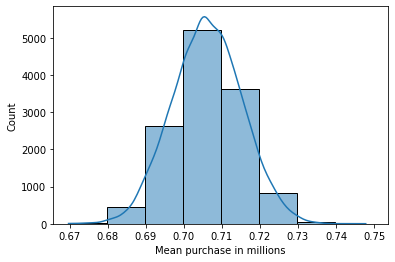

In [117]:
sns.histplot(data = bs_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Female

In [118]:
r = 31566
bs1_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Gender'] == 'F']['Purchase_Amt'], size = df1['Gender'].value_counts()[1])
    bs1_means[i] = np.mean(bs_sample)

In [379]:
print(f'\033[1m 95 % C.I for mean on purchase by a female is [{round((np.mean(bs1_means) - 2 * np.std(bs1_means))/1000000, 3)}m, {round((np.mean(bs1_means) + 2 * np.std(bs1_means))/1000000, 3)}m]\033[0m')

 95 % C.I for mean on purchase by a female is [0.548m, 0.599m]


In [378]:
print(f'\033[1m 90 % C.I for mean on purchase by a female is [{round((np.mean(bs1_means) - 1.645 * np.std(bs1_means))/1000000, 3)}m, {round((np.mean(bs1_means) + 1.645 * np.std(bs1_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a female is [0.552m, 0.595m]


In [380]:
print(f'\033[1m 99 % C.I for mean on purchase by a female is [{round((np.mean(bs1_means) - 3 * np.std(bs1_means))/1000000, 3)}m, {round((np.mean(bs1_means) + 3 * np.std(bs1_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a female is [0.535m, 0.612m]


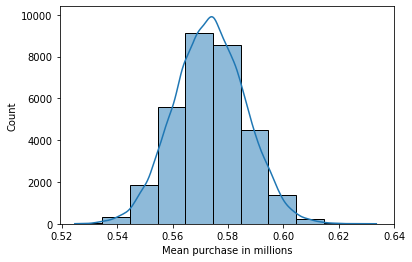

In [136]:
sns.histplot(data = bs1_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

### CLT for C.I for mean on purchase w.r.t marital status

In [381]:
df1['Marital_Status'].value_counts()

Single     3171
Married    2311
Name: Marital_Status, dtype: int64

#### Single

In [122]:
r = 15768
bs2_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Marital_Status'] == 'Single']['Purchase_Amt'], 
                                 size = df1['Marital_Status'].value_counts()[0])
    bs2_means[i] = np.mean(bs_sample)

In [417]:
print(f'\033[1m 95 % C.I for mean on purchase by a single is [{round((np.mean(bs2_means) - 2 * np.std(bs2_means))/1000000, 3)}m, {round((np.mean(bs2_means) + 2 * np.std(bs2_means))/1000000, 3)}m]\033[0m')

 95 % C.I for mean on purchase by a single is [0.659m, 0.7m]


In [383]:
print(f'\033[1m 90 % C.I for mean on purchase by a single is [{round((np.mean(bs2_means) - 1.645 * np.std(bs2_means))/1000000, 3)}m, {round((np.mean(bs2_means) + 1.645 * np.std(bs2_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a single is [0.662m, 0.696m]


In [385]:
print(f'\033[1m 99 % C.I for mean on purchase by a single is [{round((np.mean(bs2_means) - 3 * np.std(bs2_means))/1000000, 3)}m, {round((np.mean(bs2_means) + 3 * np.std(bs2_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a single is [0.649m, 0.71m]


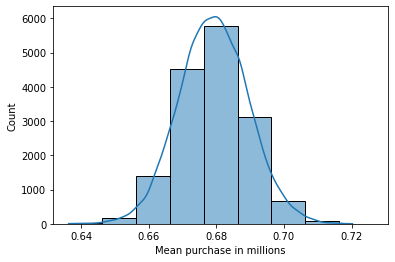

In [138]:
sns.histplot(data = bs2_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Married

In [124]:
r = 21636
bs3_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Marital_Status'] == 'Married']['Purchase_Amt'], 
                                 size = df1['Marital_Status'].value_counts()[1])
    bs3_means[i] = np.mean(bs_sample)

In [418]:
print(f'\033[1m 95 % C.I for mean on purchase by a married is [{round((np.mean(bs3_means) - 2 * np.std(bs3_means))/1000000, 3)}m, {round((np.mean(bs3_means) + 2 * np.std(bs3_means))/1000000, 3)}m]\033[0m')

 95 % C.I for mean on purchase by a married is [0.629m, 0.675m]


In [392]:
print(f'\033[1m 90 % C.I for mean on purchase by a married is [{round((np.mean(bs3_means) - 1.645 * np.std(bs3_means))/1000000, 3)}m, {round((np.mean(bs3_means) + 1.645 * np.std(bs3_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a married is [0.633m, 0.671m]


In [390]:
print(f'\033[1m 99 % C.I for mean on purchase by a married is [{round((np.mean(bs3_means) - 3 * np.std(bs3_means))/1000000, 3)}m, {round((np.mean(bs3_means) + 3 * np.std(bs3_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a married is [0.617m, 0.686m]


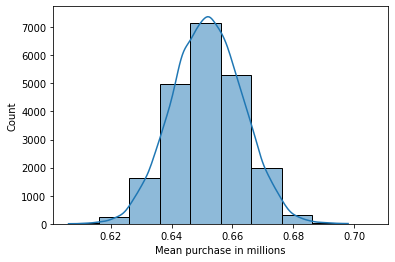

In [140]:
sns.histplot(data = bs3_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

### CLT for C.I for mean on purchase w.r.t age

In [106]:
df1['Age'].value_counts().reset_index()

,index,Age
0,26-35,1867
1,36-45,1084
2,18-25,1000
3,46-50,498
4,51-55,454
5,55+,366
6,0-17,213


#### Age = 0-17yrs

In [129]:
r = 90000
bs4_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Age'] == '0-17']['Purchase_Amt'], 
                                 size = df1['Age'].value_counts()[6])
    bs4_means[i] = np.mean(bs_sample)

In [363]:
print(f'\033[1m 95 % C.I for mean on purchase by a person in age group 0-17yrs is [{round((np.mean(bs4_means) - 2 * np.std(bs4_means))/1000000, 2)}m, {round((np.mean(bs4_means) + 2 * np.std(bs4_means))/1000000, 2)}m]\033[0m')

 95 % C.I for mean on purchase by a person in age group 0-17yrs is [0.48m, 0.6m]


In [361]:
print(f'\033[1m 90 % C.I for mean on purchase by a person in age group 0-17yrs is [{round((np.mean(bs4_means) - 1.645 * np.std(bs4_means))/1000000, 2)}m, {round((np.mean(bs4_means) + 1.645 * np.std(bs4_means))/1000000, 2)}m]\033[0m')

 90 % C.I for mean on purchase by a person in age group 0-17yrs is [0.49m, 0.59m]


In [393]:
print(f'\033[1m 99 % C.I for mean on purchase by a person in age group 0-17yrs is [{round((np.mean(bs4_means) - 3 * np.std(bs4_means))/1000000, 2)}m, {round((np.mean(bs4_means) + 3 *np.std(bs4_means))/1000000, 2)}m]\033[0m')

 99 % C.I for mean on purchase by a person in age group 0-17yrs is [0.45m, 0.63m]


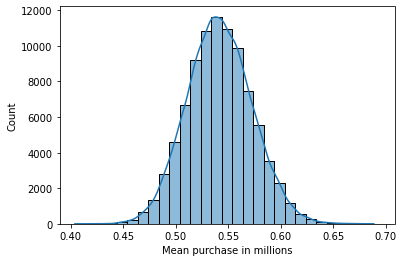

In [142]:
sns.histplot(data = bs4_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Age = 18-25yrs

In [134]:
r = 18000
bs5_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Age'] == '18-25']['Purchase_Amt'], 
                                 size = df1['Age'].value_counts()[2])
    bs5_means[i] = np.mean(bs_sample)

In [395]:
print(f'\033[1m 95 % C.I for mean on purchase by a person in age group 18-25yrs is [{round((np.mean(bs5_means) - 2 * np.std(bs5_means))/1000000, 3)}m, {round((np.mean(bs5_means) + 2 * np.std(bs5_means))/1000000, 3)}m]\033[0m')

 95 % C.I for mean on purchase by a person in age group 18-25yrs is [0.644m, 0.716m]


In [396]:
print(f'\033[1m 90 % C.I for mean on purchase by a person in age group 18-25yrs is [{round((np.mean(bs5_means) - 1.645 * np.std(bs5_means))/1000000, 3)}m, {round((np.mean(bs5_means) + 1.645 * np.std(bs5_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a person in age group 18-25yrs is [0.65m, 0.71m]


In [394]:
print(f'\033[1m 99 % C.I for mean on purchase by a person in age group 18-25yrs is [{round((np.mean(bs5_means) - 3 * np.std(bs5_means))/1000000, 3)}m, {round((np.mean(bs5_means) + 3 * np.std(bs5_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a person in age group 18-25yrs is [0.626m, 0.734m]


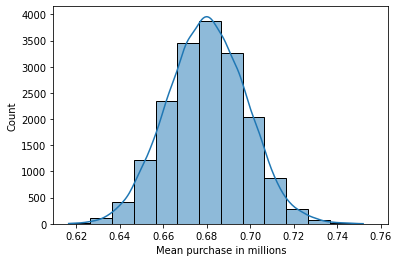

In [144]:
sns.histplot(data = bs5_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Age = 26-35yrs

In [145]:
r = 10000
bs6_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Age'] == '26-35']['Purchase_Amt'], 
                                 size = df1['Age'].value_counts()[0])
    bs6_means[i] = np.mean(bs_sample)

In [397]:
print(f'\033[1m 95 % C.I for mean on purchase by a person in age group 26-35yrs is [{round((np.mean(bs6_means) - 2 * np.std(bs6_means))/1000000, 3)}m, {round((np.mean(bs6_means) + 2 * np.std(bs6_means))/1000000, 3)}m]\033[0m')

 95 % C.I for mean on purchase by a person in age group 26-35yrs is [0.71m, 0.766m]


In [398]:
print(f'\033[1m 90 % C.I for mean on purchase by a person in age group 26-35yrs is [{round((np.mean(bs6_means) - 1.645 * np.std(bs6_means))/1000000, 3)}m, {round((np.mean(bs6_means) + 1.645 * np.std(bs6_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a person in age group 26-35yrs is [0.715m, 0.761m]


In [399]:
print(f'\033[1m 99 % C.I for mean on purchase by a person in age group 26-35yrs is [{round((np.mean(bs6_means) - 3 * np.std(bs6_means))/1000000, 3)}m, {round((np.mean(bs6_means) + 3 * np.std(bs6_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a person in age group 26-35yrs is [0.697m, 0.78m]


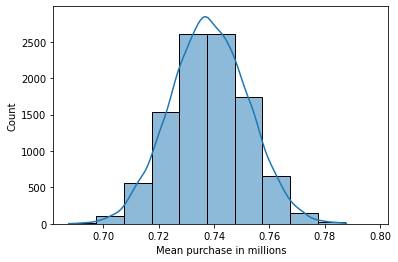

In [148]:
sns.histplot(data = bs6_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Age = 36-45yrs

In [150]:
r = 18000
bs7_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Age'] == '36-45']['Purchase_Amt'], 
                                 size = df1['Age'].value_counts()[1])
    bs7_means[i] = np.mean(bs_sample)

In [406]:
print(f'\033[1m 95% C.I for mean on purchase by a person in age group 36-45yrs is [{round((np.mean(bs7_means) - 2 * np.std(bs7_means))/1000000, 3)}m, {round((np.mean(bs7_means) + 2 * np.std(bs7_means))/1000000, 3)}m]\033[0m')

 95% C.I for mean on purchase by a person in age group 36-45yrs is [0.638m, 0.706m]


In [402]:
print(f'\033[1m 90 % C.I for mean on purchase by a person in age group 36-45yrs is [{round((np.mean(bs7_means) - 1.645 * np.std(bs7_means))/1000000, 3)}m, {round((np.mean(bs7_means) + 1.645 * np.std(bs7_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a person in age group 36-45yrs is [0.644m, 0.7m]


In [405]:
print(f'\033[1m 99 % C.I for mean on purchase by a person in age group 36-45yrs is [{round((np.mean(bs7_means) - 3 * np.std(bs7_means))/1000000, 3)}m, {round((np.mean(bs7_means) + 3 * np.std(bs7_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a person in age group 36-45yrs is [0.621m, 0.723m]


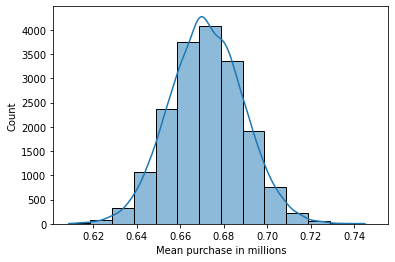

In [152]:
sns.histplot(data = bs7_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Age = 46-50yrs

In [153]:
r = 36145
bs8_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Age'] == '46-50']['Purchase_Amt'], 
                                 size = df1['Age'].value_counts()[3])
    bs8_means[i] = np.mean(bs_sample)

In [409]:
print(f'\033[1m 95% C.I for mean on purchase by a person in age group 46-50yrs is [{round((np.mean(bs8_means) - 2 * np.std(bs8_means))/1000000, 3)}m, {round((np.mean(bs8_means) + 2 * np.std(bs8_means))/1000000, 3)}m]\033[0m')

 95% C.I for mean on purchase by a person in age group 46-50yrs is [0.554m, 0.645m]


In [407]:
print(f'\033[1m 90% C.I for mean on purchase by a person in age group 46-50yrs is [{round((np.mean(bs8_means) - 1.645 * np.std(bs8_means))/1000000, 3)}m, {round((np.mean(bs8_means) + 1.645 * np.std(bs8_means))/1000000, 3)}m]\033[0m')

 90% C.I for mean on purchase by a person in age group 46-50yrs is [0.562m, 0.637m]


In [408]:
print(f'\033[1m 99% C.I for mean on purchase by a person in age group 46-50yrs is [{round((np.mean(bs8_means) - 3 * np.std(bs8_means))/1000000, 3)}m, {round((np.mean(bs8_means) + 3 * np.std(bs8_means))/1000000, 3)}m]\033[0m')

 99% C.I for mean on purchase by a person in age group 46-50yrs is [0.531m, 0.668m]


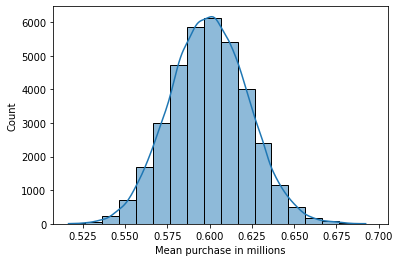

In [155]:
sns.histplot(data = bs8_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Age = 51-55yrs

In [156]:
r = 39648
bs9_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Age'] == '51-55']['Purchase_Amt'], 
                                 size = df1['Age'].value_counts()[4])
    bs9_means[i] = np.mean(bs_sample)

In [413]:
print(f'\033[1m 95 % C.I for mean on purchase by a person in age group 51-55yrs is [{round((np.mean(bs9_means) - 2 * np.std(bs9_means))/1000000, 2)}m, {round((np.mean(bs9_means) + 2 * np.std(bs9_means))/1000000, 2)}m]\033[0m')

 95 % C.I for mean on purchase by a person in age group 51-55yrs is [0.57m, 0.67m]


In [410]:
print(f'\033[1m 90 % C.I for mean on purchase by a person in age group 51-55yrs is [{round((np.mean(bs9_means) - 1.645 * np.std(bs9_means))/1000000, 3)}m, {round((np.mean(bs9_means) + 1.645 * np.std(bs9_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a person in age group 51-55yrs is [0.58m, 0.661m]


In [412]:
print(f'\033[1m 99 % C.I for mean on purchase by a person in age group 51-55yrs is [{round((np.mean(bs9_means) - 3 * np.std(bs9_means))/1000000, 3)}m, {round((np.mean(bs9_means) + 3 * np.std(bs9_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a person in age group 51-55yrs is [0.546m, 0.694m]


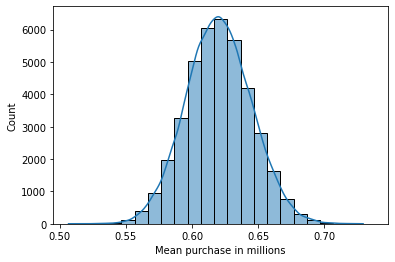

In [158]:
sns.histplot(data = bs9_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

#### Age = 55+yrs

In [160]:
r = 49181
bs10_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(df1[df1['Age'] == '55+']['Purchase_Amt'], 
                                 size = df1['Age'].value_counts()[5])
    bs10_means[i] = np.mean(bs_sample)

In [414]:
print(f'\033[1m 95 % C.I for mean on purchase by a person in age group 55+yrs is [{round((np.mean(bs10_means) - 2 * np.std(bs10_means))/1000000, 3)}m, {round((np.mean(bs10_means) + 2 * np.std(bs10_means))/1000000, 3)}m]\033[0m')

 95 % C.I for mean on purchase by a person in age group 55+yrs is [0.44m, 0.531m]


In [415]:
print(f'\033[1m 90 % C.I for mean on purchase by a person in age group 55+yrs is [{round((np.mean(bs10_means) - 1.645 * np.std(bs10_means))/1000000, 3)}m, {round((np.mean(bs10_means) + 1.645 * np.std(bs10_means))/1000000, 3)}m]\033[0m')

 90 % C.I for mean on purchase by a person in age group 55+yrs is [0.448m, 0.523m]


In [416]:
print(f'\033[1m 99 % C.I for mean on purchase by a person in age group 55+yrs is [{round((np.mean(bs10_means) - 3 * np.std(bs10_means))/1000000, 3)}m, {round((np.mean(bs10_means) + 3 * np.std(bs10_means))/1000000, 3)}m]\033[0m')

 99 % C.I for mean on purchase by a person in age group 55+yrs is [0.418m, 0.553m]


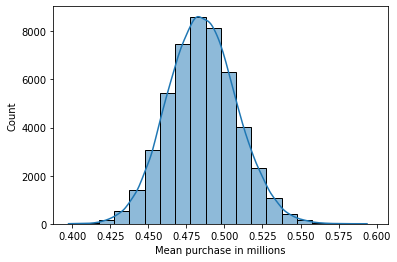

In [162]:
sns.histplot(data = bs10_means/1000000, kde = True, binwidth=0.01)
plt.xlabel('Mean purchase in millions')
plt.show()

### Product purchase count based on its price

In [176]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amt
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [187]:
len(df['Product_ID'].unique())

3631

In [221]:
x = df.groupby('Product_ID')['Purchase_Amt'].mean().to_frame().reset_index()
x

,Product_ID,Purchase_Amt
0,P00000142,11143.642361
1,P00000242,10551.851064
2,P00000342,5313.422131
3,P00000442,4795.358696
4,P00000542,5417.530201
...,...,...
3626,P0099442,14351.915000
3627,P0099642,6439.230769
3628,P0099742,7872.603175
3629,P0099842,7228.549020


In [225]:
y = df['Product_ID'].value_counts().to_frame().reset_index().rename(columns = {'index':'Product_ID', 'Product_ID':'Value_counts'})
y

,Product_ID,Value_counts
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
...,...,...
3626,P00314842,1
3627,P00298842,1
3628,P00231642,1
3629,P00204442,1


In [258]:
pd.merge(left = x, right = y).sort_values(by = 'Value_counts', ascending = False)

,Product_ID,Purchase_Amt,Value_counts
2536,P00265242,7534.848404,1880
249,P00025442,17334.468111,1615
1016,P00110742,16577.114764,1612
1030,P00112142,15503.204866,1562
565,P00057642,15716.176871,1470
...,...,...,...
669,P00068742,7099.000000,1
120,P00012342,2118.000000,1
1530,P00162742,7837.000000,1
891,P00091742,405.000000,1


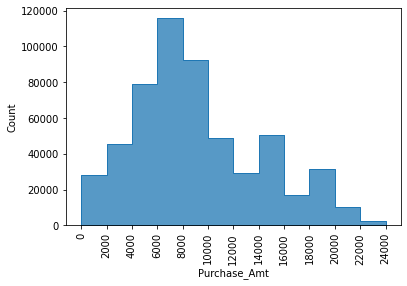

In [260]:
sns.histplot(df['Purchase_Amt'], element = 'step', bins = np.arange(0, 25000, 2000))
plt.xticks(np.arange(0, 25000, 2000), rotation = 90)
plt.show()

<AxesSubplot:xlabel='Purchase_Amt', ylabel='Density'>

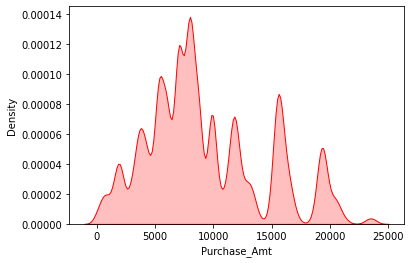

In [251]:
sns.kdeplot(df['Purchase_Amt'], shade = 'Fill', color='red')

In [265]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amt
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [280]:
df1.head()

,User_ID,Gender,Age,Marital_Status,Purchase_Amt
0,1000001,F,0-17,Single,334093
1,1000002,M,55+,Single,810472
2,1000003,M,26-35,Single,341635
3,1000004,M,46-50,Married,206468
4,1000005,M,26-35,Married,821001


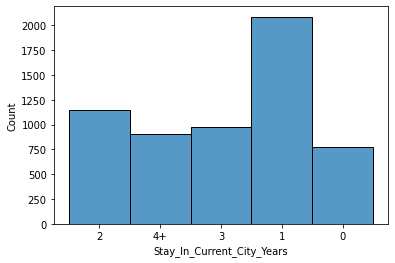

In [283]:
sns.histplot(df1['Stay_In_Current_City_Years'])
plt.show()

In [278]:
pd.crosstab(new_df['Purchase_Amt'], new_df['Stay_In_Current_City_Years'], normalize='index').corr()

Stay_In_Current_City_Years,0,1,2,3,4+
Stay_In_Current_City_Years,,,,,
0,1.000000,0.262897,-0.490515,-0.347513,0.133796
1,0.262897,1.000000,-0.870561,0.246512,-0.035683
2,-0.490515,-0.870561,1.000000,-0.289394,-0.144339
3,-0.347513,0.246512,-0.289394,1.000000,-0.604683
4+,0.133796,-0.035683,-0.144339,-0.604683,1.000000


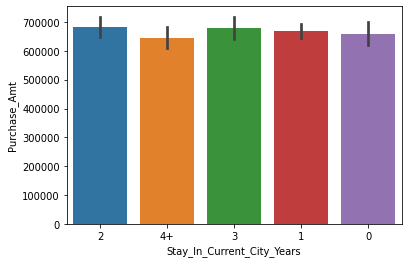

In [288]:
sns.barplot(x = df1['Stay_In_Current_City_Years'], y = df1['Purchase_Amt'])
plt.show()

In [297]:
### Not much change in average purchase amount
df1.groupby('Stay_In_Current_City_Years')['Purchase_Amt'].mean()

Stay_In_Current_City_Years
0     659472.676471
1     668286.765432
2     681871.243068
3     678127.352159
4+    644372.381406
Name: Purchase_Amt, dtype: float64

In [295]:
df1

,User_ID,Gender,Age,Marital_Status,Stay_In_Current_City_Years,Purchase_Amt
0,1000001,F,0-17,Single,2,334093
1,1000002,M,55+,Single,4+,810472
2,1000003,M,26-35,Single,3,341635
3,1000004,M,46-50,Married,2,206468
4,1000005,M,26-35,Married,1,821001
...,...,...,...,...,...,...
5885,1006035,F,26-35,Single,3,956645
5887,1006037,F,46-50,Single,4+,1119538
5888,1006038,F,55+,Single,2,90034
5889,1006039,F,46-50,Married,4+,590319


<AxesSubplot:xlabel='City_Category', ylabel='Count'>

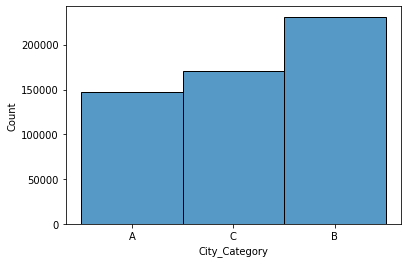

In [298]:
sns.histplot(df['City_Category'])

In [303]:
df1['City_Category'] = df['City_Category']

In [320]:
IQR1 = np.percentile(df['Purchase_Amt'], 75) - np.percentile(df1['Purchase_Amt'], 25)
Max1 = np.percentile(df['Purchase_Amt'], 75) + 1.5 * IQR
Min1 = np.percentile(df['Purchase_Amt'], 25) - 1.5 * IQR

<AxesSubplot:xlabel='City_Category', ylabel='Count'>

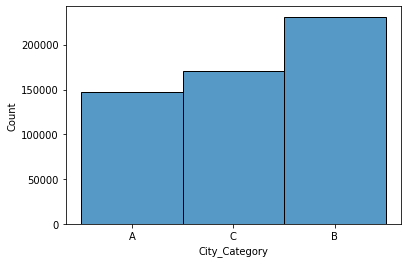

In [323]:
sns.histplot(df['City_Category'])

In [322]:
df = df[(df['Purchase_Amt'] <= Max1)]

<AxesSubplot:xlabel='City_Category', ylabel='Purchase_Amt'>

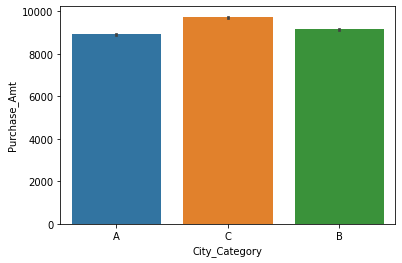

In [324]:
sns.barplot(x = df['City_Category'], y = df['Purchase_Amt'])

In [327]:
### Not much change in average purchase amount
df.groupby('City_Category')['Purchase_Amt'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase_Amt, dtype: float64

In [328]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amt
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


C:\Users\SHREE KRISHNA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


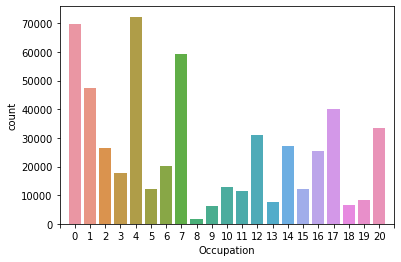

In [359]:
sns.countplot(df['Occupation'])
plt.xticks(np.arange(-1, 22, 1))
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Purchase_Amt'>

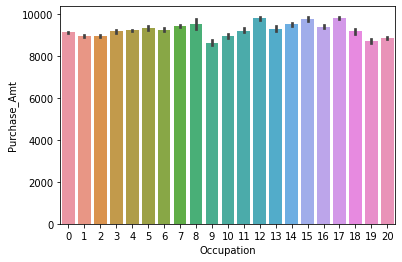

In [336]:
sns.barplot(x = df['Occupation'], y = df['Purchase_Amt'])

In [340]:
### Not much change in average purchase amount
df.groupby('Occupation')['Purchase_Amt'].mean()

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase_Amt, dtype: float64